<a href="https://colab.research.google.com/github/EmiliyaZhukovich/machine_learning/blob/Zhukovich/Lasso_Ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Код реализует модель Lasso-регрессии с использованием градиентного спуска для оптимизации коэффициентов модели**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_csv('data.csv')
X = data.iloc[:, :-1].values  # Все столбцы кроме последнего - признаки
y = data.iloc[:, -1].values   # Последний столбец - целевая переменная


In [ ]:
#лассо регрессия
def lasso_gradient_descent(X, y, alpha, learning_rate=0.01, n_iterations=1000):
    n_samples, n_features = X.shape
    coefficients = np.zeros(n_features)

    for _ in range(n_iterations):
        # Вычисление предсказания
        y_pred = X @ coefficients

        # Вычисление градиента с L1 регуляризацией
        residuals = y - y_pred
        gradient = -2 * (X.T @ residuals) * learning_rate + alpha * np.sign(coefficients)

        # Обновление коэффициентов
        coefficients -= learning_rate * gradient

    return coefficients

In [ ]:
# Применение Lasso регрессии
alpha = 0.1
coefficients = lasso_gradient_descent(X, y, alpha)
y_pred = X @ coefficients

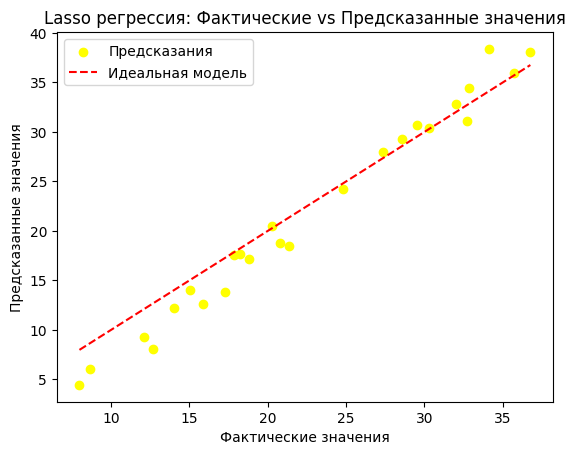

Коэффициенты модели: [3.48368666 2.84142265]


In [ ]:
# Визуализация
plt.scatter(y, y_pred, color='yellow', label='Предсказания')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Идеальная модель')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Lasso регрессия: Фактические vs Предсказанные значения')
plt.legend()
plt.show()

print("Коэффициенты модели:", coefficients)

**В данном коде используется Lasso-регрессия для предсказания значения целевой переменной на основе признаков из набора данных Boston**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('boston.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Предсказание значений
y_pred = lasso.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Коэффициенты модели Lasso:", lasso.coef_)
print("Среднеквадратичная ошибка:", mse)
print("Коэффициент детерминации R²:", r2)

Коэффициенты модели Lasso: [-0.10415691  0.03489335 -0.01678527  0.91995182 -0.          4.31168655
 -0.01512583 -1.15148729  0.23923695 -0.01296223 -0.73224678  0.01309057
 -0.56467442]
Среднеквадратичная ошибка: 25.15559375393417
Коэффициент детерминации R²: 0.6569712802223937


Text(0.5, 1.0, 'Lasso регрессия: предсказания vs факт')

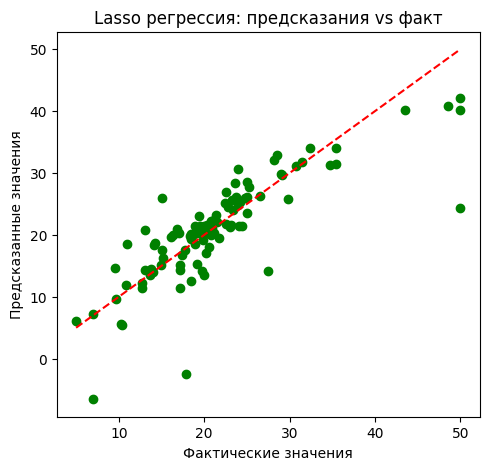

In [ ]:
# Визуализация результатов
plt.figure(figsize=(12, 5))

# График сравнения предсказанных и фактических значений
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Lasso регрессия: предсказания vs факт')

Выводы:

Коэффициенты модели показывают, как каждый признак влияет на предсказание. Некоторые коэффициенты могут быть нулевыми или очень маленькими, что указывает на отбор признаков (влияние регуляризации).

Среднеквадратичная ошибка (MSE) равна примерно 25.16. Это показатель того, как сильно предсказания отклоняются от реальных значений.

Коэффициент детерминации R² равен 0.6569, что означает, что модель объясняет около 65.7% вариации целевой переменной. Это не идеальный результат, но модель дает достаточно хорошее приближение.

**Этот код реализует модель Ridge-регрессии для предсказания значений на основе набора данных Boston**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('boston.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Создание и обучение модели
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Предсказание значений
y_pred = ridge.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Коэффициенты модели Ridge:", ridge.coef_)
print("Среднеквадратичная ошибка:", mse)
print("Коэффициент детерминации R²:", r2)

Коэффициенты модели Ridge: [-0.96203397  0.68255872  0.25071604  0.71033762 -1.96157279  3.12232106
 -0.17845861 -3.0100255   2.20195592 -1.71784558 -1.97082455  1.12414013
 -3.61478723]
Среднеквадратичная ошибка: 24.314537463956363
Коэффициент детерминации R²: 0.6684401592810273


Text(0.5, 1.0, 'Ridge регрессия: предсказания vs факт')

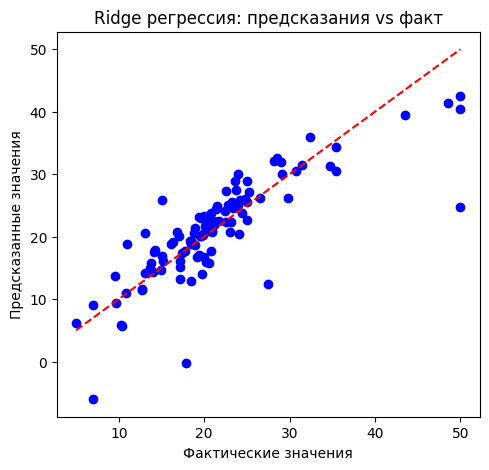

In [ ]:
# Визуализация результатов
plt.figure(figsize=(12, 5))

# График сравнения предсказанных и фактических значений
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Ridge регрессия: предсказания vs факт')

**Результаты:**

Коэффициенты модели показывают влияние каждого признака на предсказание. Например, для некоторых признаков коэффициенты могут быть отрицательными, что указывает на отрицательную зависимость от целевой переменной.

Среднеквадратичная ошибка (MSE) составляет около 24.31, что указывает на среднее отклонение предсказанных значений от истинных.

Коэффициент детерминации R² равен 0.6684, что означает, что модель объясняет около 66.8% вариации целевой переменной. Это не идеальный результат, но модель дает разумное приближение.

**Этот код выполняет задачу регрессии на данных о недвижимости, используя два метода: Ridge-регрессию и Lasso-регрессию.**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('Nedvig.xlsx')

# обработка данных
le_district = LabelEncoder()
le_house_type = LabelEncoder()
data['Район'] = le_district.fit_transform(data['Район'])
data['Тип дома'] = le_house_type.fit_transform(data['Тип дома'])

X = data[['Число комнат', 'Общая', 'Жилая', 'Кухня']]
X = pd.get_dummies(data, columns=['Район', 'Тип дома'], drop_first=True)
y = data['Цена'].values

# вставка пропущенных значений (иначе программа не работает)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# характеристики шкал
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# тренировочные модели
ridge = Ridge(alpha=1000)
lasso = Lasso(alpha=1000)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# предсказания
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

# вывод результатов
print("Ridge Regression:")
print(f"MSE: {ridge_mse:.4f}")
print(f"R²: {ridge_r2:.4f}")
print("\nRidge Coefficients:")
for feat, coef in zip(['Район', 'Число комнат', 'Тип дома', 'Индикаторная переменная',
                      'Общая', 'Жилая', 'Кухня'], ridge.coef_):
    print(f"{feat}: {coef:.4f}")


Ridge Regression:
MSE: 132472.0180
R²: 0.8554

Ridge Coefficients:
Район: 72.3724
Число комнат: 44.6530
Тип дома: -7.6958
Индикаторная переменная: -8.0906
Общая: -22.1949
Жилая: -14.9865
Кухня: 784.9314


In [ ]:
print("\nLasso Regression:")
print(f"MSE: {lasso_mse:.4f}")
print(f"R²: {lasso_r2:.4f}")
print("\nLasso Coefficients:")
for feat, coef in zip(['Район', 'Число комнат', 'Тип дома', 'Индикаторная переменная',
                      'Общая', 'Жилая', 'Кухня'], lasso.coef_):
    print(f"{feat}: {coef:.4f}")


Lasso Regression:
MSE: 387458.2810
R²: 0.5771

Lasso Coefficients:
Район: 0.0000
Число комнат: 0.0000
Тип дома: -0.0000
Индикаторная переменная: -0.0000
Общая: -0.0000
Жилая: -0.0000
Кухня: 482.4436


Text(0.5, 1.0, 'Ridge Regression')

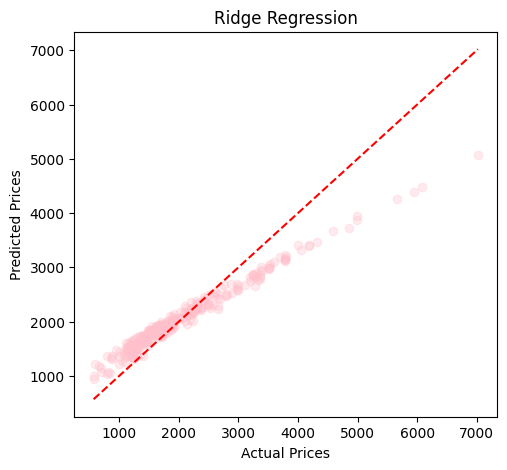

In [ ]:
# визуализация
plt.figure(figsize=(12, 5))

# ридж
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, color='pink', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Ridge Regression')


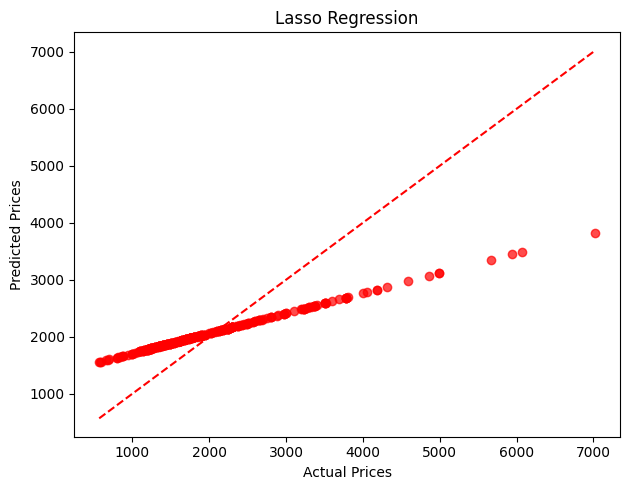

In [ ]:
# визуализация
plt.figure(figsize=(12, 5))
# лассо
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso, color='red', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Lasso Regression')

plt.tight_layout()
plt.show()

**Результаты:**

Ridge-регрессия:

MSE: 132472.0180

R²: 0.8554 (модель объясняет 85.5% вариации целевой переменной)

Коэффициенты показывают, как каждый признак влияет на цену, например, "Район" имеет коэффициент 72.3724, что говорит о положительном влиянии этого признака на цену.

Lasso-регрессия:

MSE: 387458.2810

R²: 0.5771 (модель объясняет только 57.7% вариации)

В Lasso-регрессии некоторые коэффициенты становятся равными нулю (например, для признаков "Район", "Число комнат"), что указывает на селекцию признаков.

**1. Что такое Ridge-регрессия?**

Ridge-регрессия — это метод линейной регрессии с L2-регуляризацией, который помогает предотвратить переобучение модели. Она добавляет штраф за большие коэффициенты модели, что уменьшает их величины. Это особенно полезно, когда признаки коррелируют между собой (мультиколлинеарность) или когда данных много, а признаков — немного.
Сумма квадратов кэффициентов


**2. Что такое регрессия Lasso?**

Lasso-регрессия — это метод линейной регрессии с L1-регуляризацией, который также уменьшает переобучение. Она добавляет штраф за абсолютные значения коэффициентов. Lasso может обнулять некоторые коэффициенты, тем самым выполняя выбор признаков и исключая малозначимые переменные.
Сумма модулей коэффициентов

**3. В каких случаях они применяются?**

Ridge-регрессия применяется, когда у вас много признаков, и важно избежать переобучения, но все признаки являются важными. Также полезна, когда признаки сильно коррелируют друг с другом.

Lasso-регрессия используется, когда необходимо провести селекцию признаков, исключив незначимые переменные, или когда мультиколлинеарность мешает модели работать стабильно.